In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [3]:
# Hyper Parameters
input_size=1
output_size=1
num_epochs=60
learning_rate=0.001

In [4]:
# Toy Dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [15]:
print(np.size(x_train))
print(np.size(y_train))

15
15


In [5]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
        
    def forward(self,x):
        out=self.linear(x)
        return out

model=LinearRegression(input_size,output_size)

# Loss and Optimizer
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [23]:
# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs=Variable(torch.from_numpy(x_train))
    targets=Variable(torch.from_numpy(y_train))
    
    # Forward + Backward + Optimize
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=criterion(outputs,targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        # print('Epoch [%d/%d], Loss: %.4f' %(epoch+1,num_epochs,loss.data[0])) 使用data[0]报错，改为loss.data和loss.item()均可
        print('Epoch [%d/%d], Loss: %.4f' %(epoch+1,num_epochs,loss.data))
    

Epoch [5/60], Loss: 0.3649
Epoch [10/60], Loss: 0.3644
Epoch [15/60], Loss: 0.3639
Epoch [20/60], Loss: 0.3634
Epoch [25/60], Loss: 0.3629
Epoch [30/60], Loss: 0.3624
Epoch [35/60], Loss: 0.3619
Epoch [40/60], Loss: 0.3614
Epoch [45/60], Loss: 0.3609
Epoch [50/60], Loss: 0.3604
Epoch [55/60], Loss: 0.3599
Epoch [60/60], Loss: 0.3594


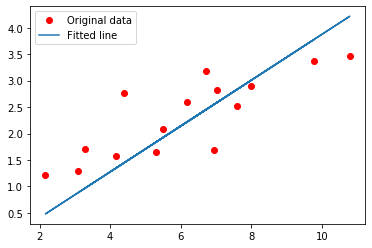

In [34]:
# Plot the graph
predicted=model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train,y_train,'ro',label='Original data')
plt.plot(x_train,predicted,label='Fitted line')
plt.legend()
plt.show()

# Save the Model
torch.save(model.state_dict(),'model.pkl')